# Compute gcorr between vascular phenotypes (ldscr)
###### Created 03/08/2022

In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join

In [325]:
# path to the folder containing the .lo files
path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/2022_07_08_ventile2__FINAL'

In [338]:
traits=[#'AVScore_all',
        'tau1_all', 'tau1_artery', 'tau1_vein', 'tau2_all', 'tau2_artery', 'tau2_vein', 'tau4_all', 
        'tau4_artery', 'tau4_vein','D_A_std_std', 'D_V_std_std', 'D_median_CVMe', 
        'N_median_main_arteries', 'N_median_main_veins', 'arcLength_artery', 
        'arcLength_vein', 'bifurcations', 'VD_orig_all', 'VD_orig_artery', 'VD_orig_vein', 
        'slope', 'slope_artery', 'slope_vein', 'mean_angle_taa', 'mean_angle_tva', 'medianCenter1_artery', 
        'medianCenter1_vein', 'eq_CRAE', 'eq_CRVE', 'median_CRAE', 
        'median_CRVE', 'ratio_CRAE_CRVE', 'ratio_median_CRAE_CRVE',
        'medianDiameter_all', 'medianDiameter_artery', 'medianDiameter_vein', 'ratio_AV_medianDiameter' ]


In [339]:
# filter the files names containing 2 traits
df_cov=pd.DataFrame(columns =traits, index=traits)
df_corr=pd.DataFrame(columns =traits, index=traits)

for i  in range(len(traits)):
    for j in range(len(traits)):
        h2 = []
        with open(path+'/'+traits[i]+'__munged.sumstats.gz_'+ traits[j]+'__munged.sumstats.gz.log') as fp:
            #print(fp)
            Lines = fp.readlines()
            for line in Lines:
                split = line.split()
                if('gencov:' in split):
                    df_cov.iloc[i][j] = float(split[ split.index('gencov:') +1 ])
                    df_cov.iloc[j][i] = float(split[ split.index('gencov:') +1 ])
                    #print(split)
                if('Correlation:' in split):
                    #print(split)
                    df_corr.iloc[i][j] = float(split[ split.index('Correlation:') +1 ]) 
                    df_corr.iloc[j][i] = float(split[ split.index('Correlation:') +1 ])
                    #print(array2)
                    #print(split )
                    #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                    #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))



In [340]:
df_corr = df_corr.astype(float)

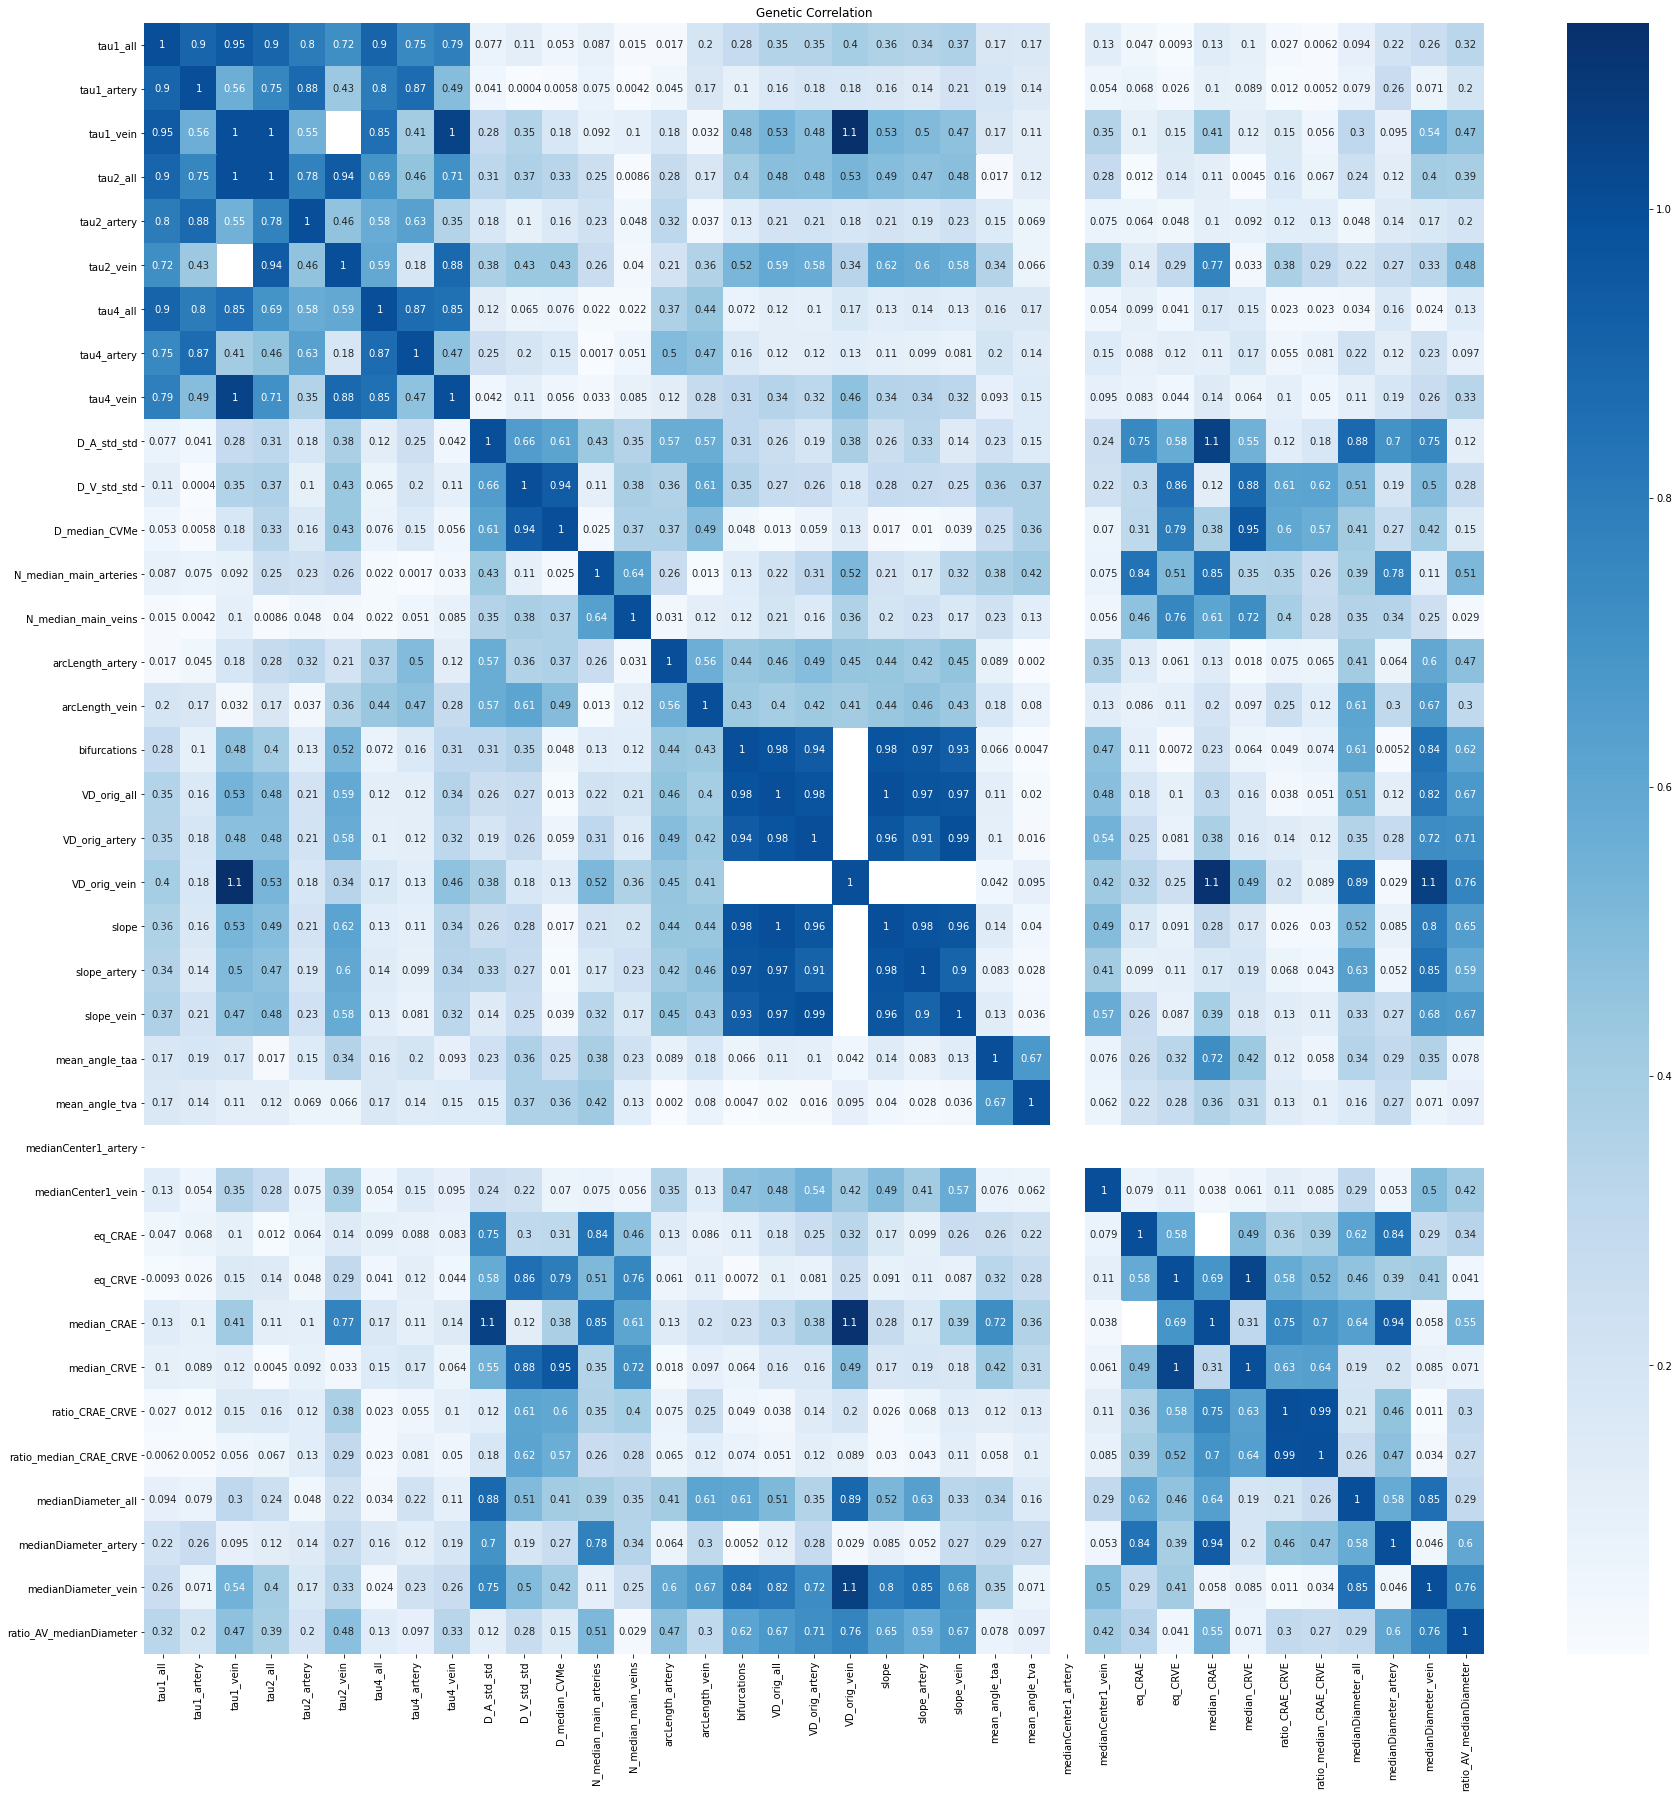

In [344]:
#### gen corr

#plt.figure(figsize=(80,80))
plt.figure(figsize=(30,30))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/gcorr_03_08_2022.jpg')



# pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
# clustering method: average

Count nans:  12 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


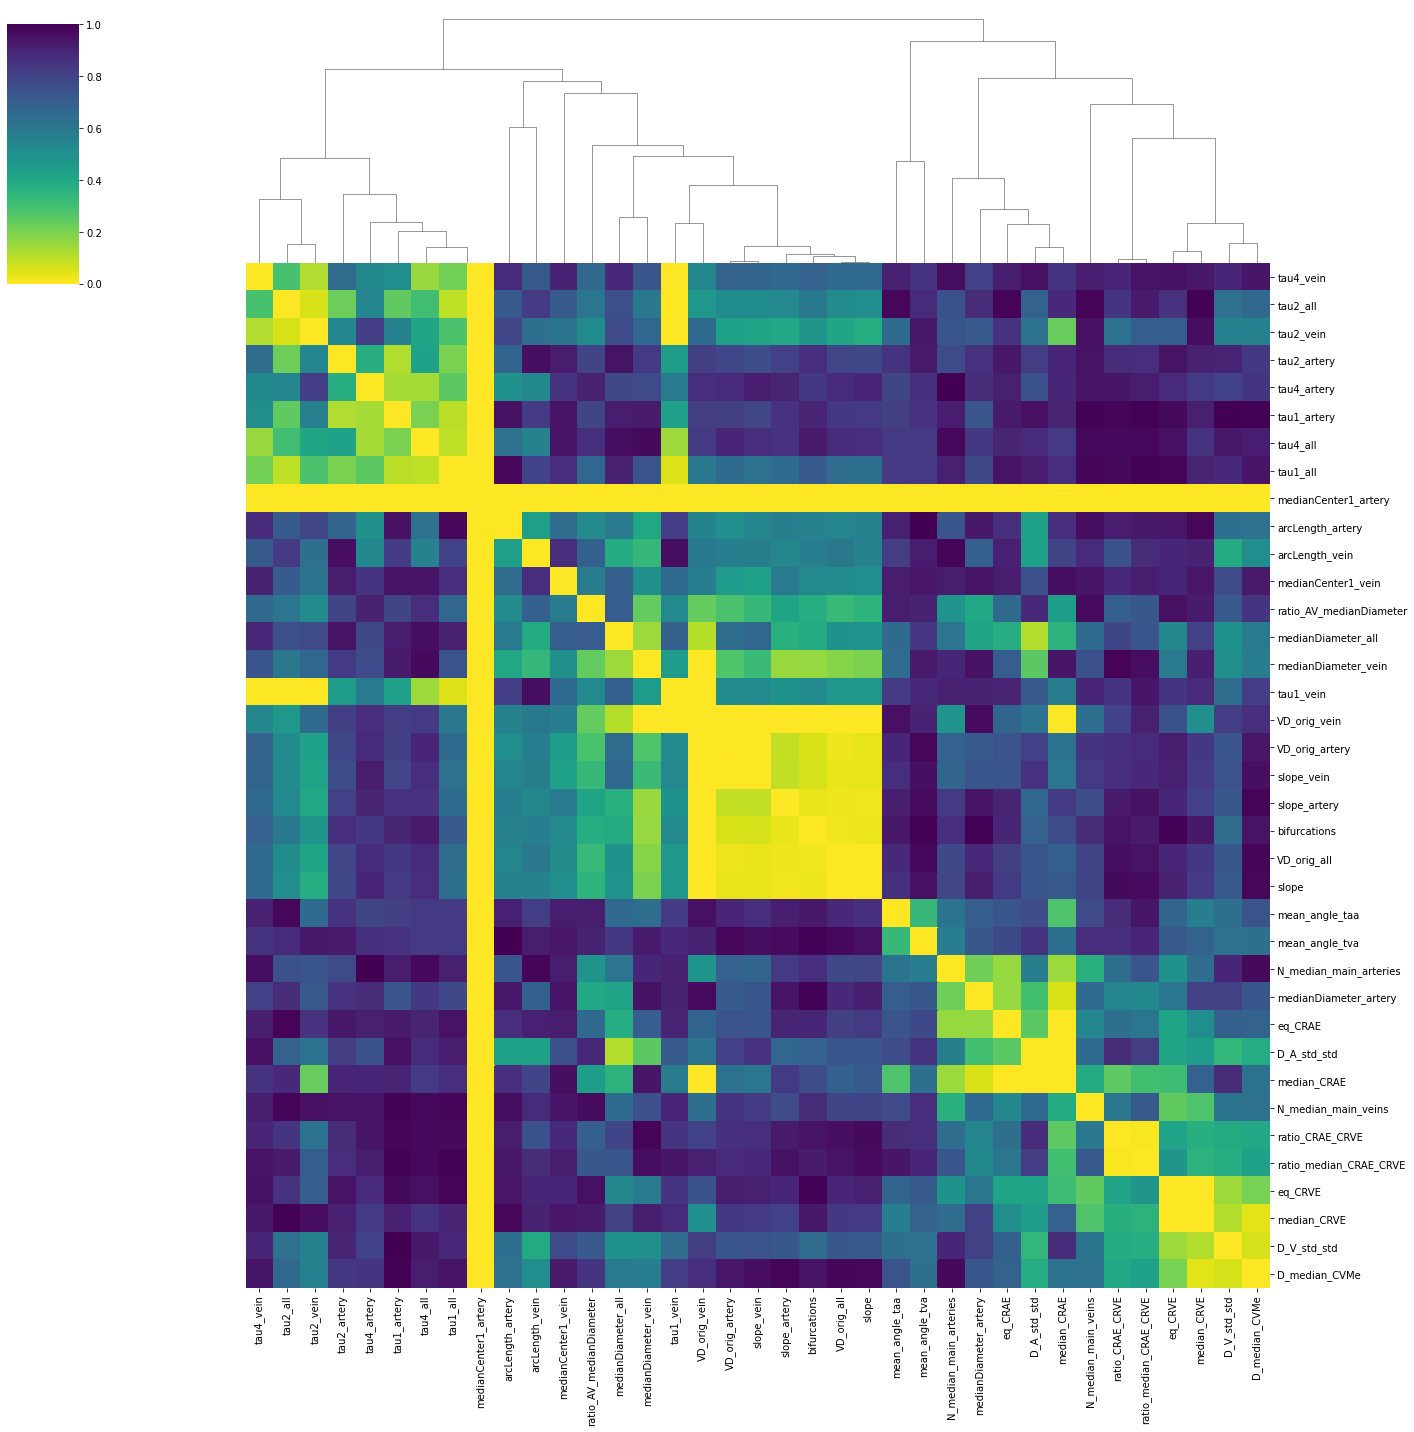

In [345]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/03_08_2022_gcorrimagen.jpg')